In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit
from utils import plot_learning_curve, my_load_wine, print_tree, get_estimator_final_score, plot_loss_curve
import graphviz 

# Boosting
## Breast Cancer Wisconsin (Diagnostic) Data Set

In [4]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Playing with the number of weak learners

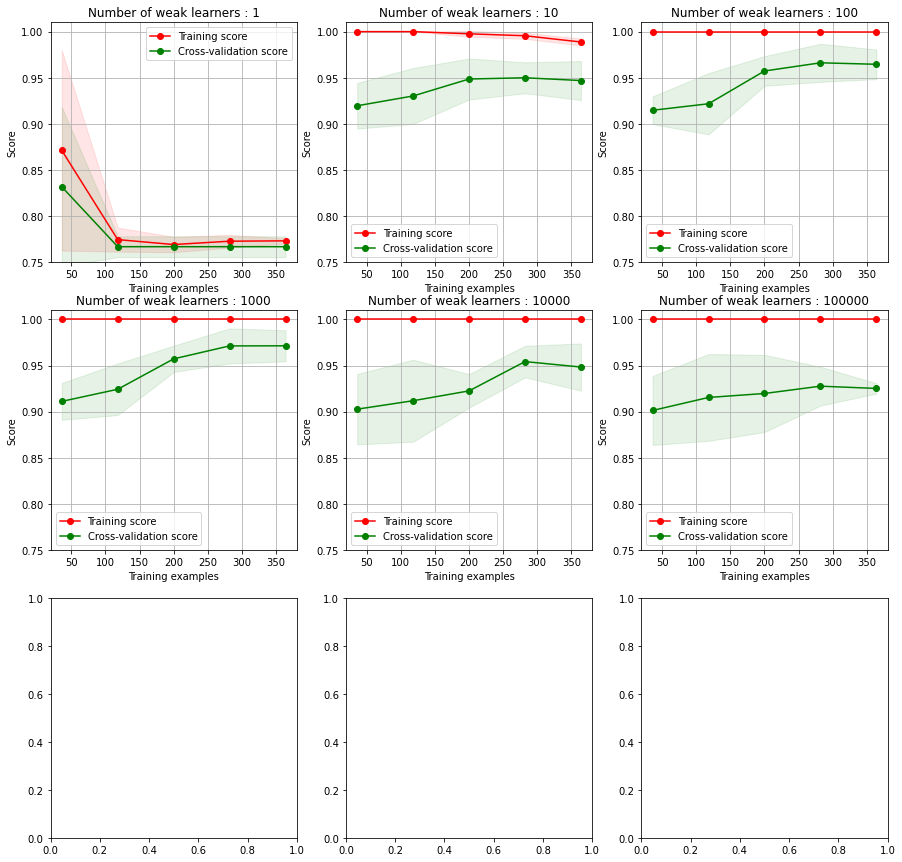

In [7]:
# This can be very slow!!
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
nb_weak_learners = 1
ylim = (0.75, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i in range(6):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Number of weak learners : {nb_weak_learners}"
    estimator = GradientBoostingClassifier(n_estimators=nb_weak_learners)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")
    nb_weak_learners *= 10

### Playing with pruning

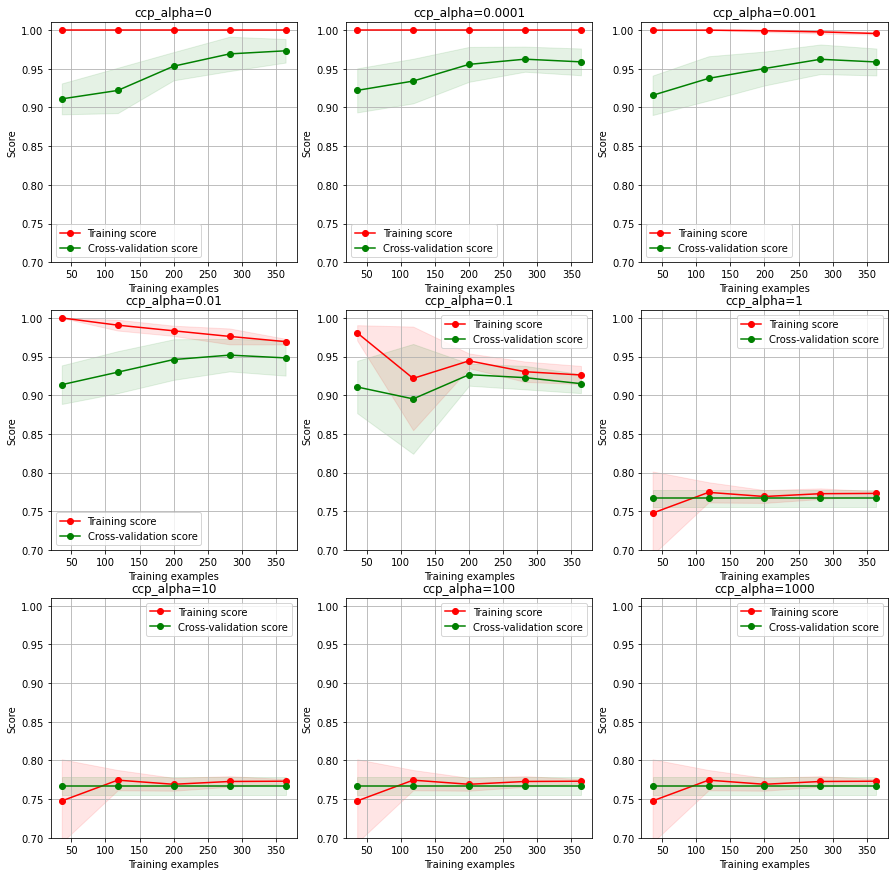

In [10]:
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
ccp_alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
ylim = (0.7, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, ccp_alpha in enumerate(ccp_alpha_values):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"ccp_alpha={ccp_alpha}"
    estimator = GradientBoostingClassifier(ccp_alpha=ccp_alpha, n_estimators=1000)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

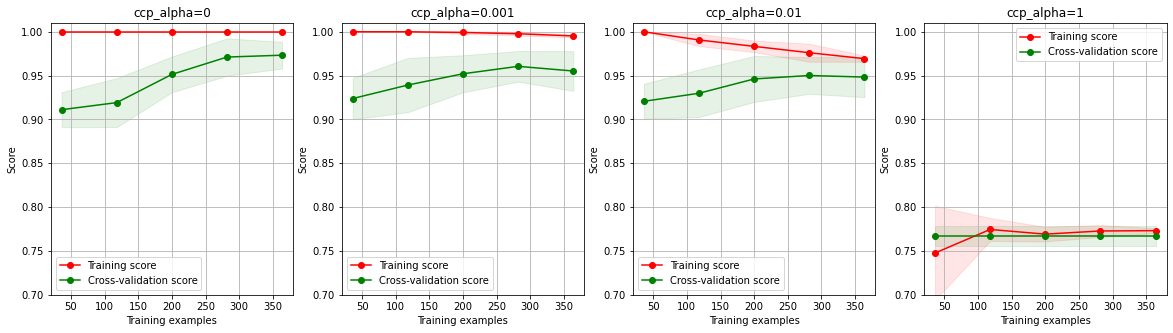

In [12]:
grid_size = 4
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
ccp_alpha_values = [0, 0.001, 0.01, 1]
ylim = (0.7, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, ccp_alpha in enumerate(ccp_alpha_values):
    axe_to_plot = axes[i]
    title = f"ccp_alpha={ccp_alpha}"
    estimator = GradientBoostingClassifier(ccp_alpha=ccp_alpha, n_estimators=1000)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

In [14]:
estimator = GradientBoostingClassifier(ccp_alpha=0, n_estimators=100)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0 and n_estimators=100", "f1")
estimator = GradientBoostingClassifier(ccp_alpha=0, n_estimators=1000)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0 and n_estimators=100", "f1")
estimator = GradientBoostingClassifier(ccp_alpha=0.001, n_estimators=100)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0.001 and n_estimators=100", "f1")
estimator = GradientBoostingClassifier(ccp_alpha=0.001, n_estimators=1000)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0.001 and n_estimators=1000", "f1")

Test f1 score for ccp_alpha=0 and n_estimators=100: 0.965034965034965
Test f1 score for ccp_alpha=0 and n_estimators=100: 0.9722222222222222
Test f1 score for ccp_alpha=0.001 and n_estimators=100: 0.965034965034965
Test f1 score for ccp_alpha=0.001 and n_estimators=1000: 0.965034965034965


0.965034965034965

## Wine Quality Data Set

In [15]:
wine = my_load_wine("../Datasets/wine/")
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Playing with the number of weak learners

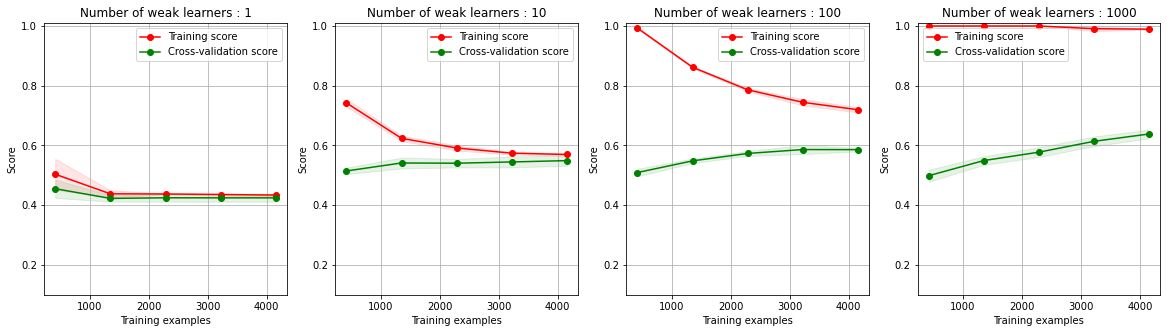

In [23]:
# This can be very slow!!
grid_size = 4
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
nb_weak_learners = 1
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i in range(4):
    axe_to_plot = axes[i]
    title = f"Number of weak learners : {nb_weak_learners}"
    estimator = GradientBoostingClassifier(n_estimators=nb_weak_learners)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="accuracy")
    nb_weak_learners *= 10

In [27]:
# This is very slow!!
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
nb_weak_learners = 1000
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i in range(2):
    axe_to_plot = axes[i]
    estimator = GradientBoostingClassifier(n_estimators=nb_weak_learners)
    estimator.fit(X_train_train, y_train_train)
    print(f"model with {nb_weak_learners} weak learners got {estimator.score(X_train_train, y_train_train)} on training and {estimator.score(X_train_validation, y_train_validation)} on validation")
    nb_weak_learners *= 10

model with 1000 weak learners got 0.9796878340816763 on training and 0.6307692307692307 on validation
model with 10000 weak learners got 1.0 on training and 0.6211538461538462 on validation


### Playing with pruning

In [30]:
# This is very slow!!
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
nb_weak_learners = 1000
ccp_alpha_values = [0, 0.001, 0.01, 1]
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, ccp_alpha in enumerate(ccp_alpha_values):
    axe_to_plot = axes[i]
    estimator = GradientBoostingClassifier(n_estimators=nb_weak_learners, ccp_alpha=ccp_alpha)
    estimator.fit(X_train_train, y_train_train)
    print(f"model with {nb_weak_learners} weak learners and ccp_alpha={ccp_alpha} got {estimator.score(X_train_train, y_train_train)} on training and {estimator.score(X_train_validation, y_train_validation)} on validation")

model with 1000 weak learners and ccp_alpha=0 got 0.9796878340816763 on training and 0.6307692307692307 on validation
model with 1000 weak learners and ccp_alpha=0.001 got 0.5467179816121446 on training and 0.5615384615384615 on validation
model with 1000 weak learners and ccp_alpha=0.01 got 0.5321787470600813 on training and 0.5384615384615384 on validation
model with 1000 weak learners and ccp_alpha=1 got 0.4304041051956382 on training and 0.4346153846153846 on validation


In [31]:
estimator = GradientBoostingClassifier(ccp_alpha=0, n_estimators=1000)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "ccp_alpha=0 and n_estimators=1000", "accuracy")

Test accuracy score for ccp_alpha=0 and n_estimators=1000: 0.6361538461538462


0.6361538461538462